Hola &#x1F600;

Soy **Hesus Garcia**  como "Jesús" pero con H. Sé que puede ser confuso al principio, pero una vez que lo recuerdes, ¡nunca lo olvidarás! &#x1F31D;	. Como revisor de código de Triple-Ten, estoy emocionado de examinar tus proyectos y ayudarte a mejorar tus habilidades en programación. si has cometido algún error, no te preocupes, pues ¡estoy aquí para ayudarte a corregirlo y hacer que tu código brille! &#x1F31F;. Si encuentro algún detalle en tu código, te lo señalaré para que lo corrijas, ya que mi objetivo es ayudarte a prepararte para un ambiente de trabajo real, donde el líder de tu equipo actuaría de la misma manera. Si no puedes solucionar el problema, te proporcionaré más información en la próxima oportunidad. Cuando encuentres un comentario,  **por favor, no los muevas, no los modifiques ni los borres**. 

Revisaré cuidadosamente todas las implementaciones que has realizado para cumplir con los requisitos y te proporcionaré mis comentarios de la siguiente manera:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

</br>

**¡Empecemos!**  &#x1F680;

El servicio de venta de autos usados Rusty Bargain está desarrollando una aplicación para atraer nuevos clientes. Gracias a esa app, puedes averiguar rápidamente el valor de mercado de tu coche. Tienes acceso al historial: especificaciones técnicas, versiones de equipamiento y precios. Tienes que crear un modelo que determine el valor de mercado.
A Rusty Bargain le interesa:
- la calidad de la predicción;
- la velocidad de la predicción;
- el tiempo requerido para el entrenamiento

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Me parece que podrías haber incluido una tabla de contenidos en tu documento, esto facilitará la navegación y comprensión de los temas que estás tratando. ¡Sigue así!</div>
</div>


## Preparación de datos

### Carga de librerías
Se procederá a cargar las librerías que se utilizarán para este proyecto

In [1]:
# Carga de librerías:
from scipy import stats as st
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

import seaborn as sns

#Librerías para preprocesamiento:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#Librerías para machine learning
from numpy.random import RandomState
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Librerias para potenciación de gradiente
## Instalar lightgmb
!pip install lightgbm
from lightgbm import LGBMRegressor

# Libreria de CatBoostRegressor
from catboost import Pool, CatBoostRegressor

# Librería de XGBoost
import xgboost as xgb

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Quería proporcionarte algunos comentarios sobre la organización de los imports en tu código. Entiendo que esto se te proporcionó como parte de una plantilla, sin embargo es importante destacar el orden de los imports. 
    
Es preferible agrupar los imports siguiendo el siguiente orden:

Imports de la biblioteca estándar de Python.
Imports de bibliotecas de terceros relacionadas.
Imports específicos de la aplicación local o biblioteca personalizada.
Para mejorar la legibilidad del código, también es recomendable dejar una línea en blanco entre cada grupo de imports, pero solo un import por línea.
Te dejo esta referencia con ejemplos:  
https://pep8.org/#imports

</div>

### Carga de bases de datos
Se realizará la importación de las bases de datos:

In [2]:
## Importando los datos:
df = pd.read_csv('/datasets/car_data.csv')

Vamos a imprimir una muestra de los datos cargados para dar un vistazo general

In [3]:
df

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,21/03/2016 09:50,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,21/03/2016 00:00,0,2694,21/03/2016 10:42
354365,14/03/2016 17:48,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,14/03/2016 00:00,0,39576,06/04/2016 00:46
354366,05/03/2016 19:56,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,05/03/2016 00:00,0,26135,11/03/2016 18:17
354367,19/03/2016 18:57,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,19/03/2016 00:00,0,87439,07/04/2016 07:15


Con una pequeña muestra de las bases de datos podemos observar que el dataframe contiene 354369 filas de datos y 16 columnas con características. Se observa que algunos de los automóviles presentan datos ausentes (NaN), lo cual se debe analizar posteriormente que se va a hacer con esta información ausente.

### Exploración de datos iniciales
Vamos a utilizar funciones para analizar como se encuentran los datos:


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

Este conjunto de datos contiene los siguiente campos:

- `DateCrawled`: fecha en la que se descargó el perfil de la base de datos
- `VehicleType`: tipo de carrocería del vehículo
- `RegistrationYear`: año de matriculación del vehículo
- `Gearbox`: tipo de caja de cambios
- `Power`: potencia (CV)
- `Model`: modelo del vehículo
- `Mileage`: kilometraje (medido en km de acuerdo con las especificidades regionales del conjunto de datos)
- `RegistrationMonth`: mes de matriculación del vehículo
- `FuelType`: tipo de combustible
- `Brand`: marca del vehículo
- `NotRepaired`: vehículo con o sin reparación
- `DateCreated`: fecha de creación del perfil
- `NumberOfPictures`: número de fotos del vehículo
- `PostalCode`: código postal del propietario del perfil (usuario)
- `LastSeen`: fecha de la última vez que el usuario estuvo activo

Vamos a continuación a revisar anomalías en los datos:

In [5]:
df.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


Vamos a analizar los datos NaN:

In [6]:
nan_count = df.isnull().sum()
nan_count

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Mileage                  0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

Se observa que hay una gran cantidad de datos ausentes en algunas de las columnas. Esta información ausente es muy importante para el avaluo de un automovil, por lo que se analizará posteriormente que se debe hacer con estos datos.

Se revisará tambien la cantidad de datos con valor 0:

In [7]:
zero_count = (df == 0).sum()
zero_count

DateCrawled               0
Price                 10772
VehicleType               0
RegistrationYear          0
Gearbox                   0
Power                 40225
Model                     0
Mileage                   0
RegistrationMonth     37352
FuelType                  0
Brand                     0
NotRepaired               0
DateCreated               0
NumberOfPictures     354369
PostalCode                0
LastSeen                  0
dtype: int64

In [8]:
df["RegistrationMonth"].unique()

array([ 0,  5,  8,  6,  7, 10, 12, 11,  2,  3,  1,  4,  9])

<div class="alert alert-block alert-success">
    <b>Comentarios del Revisor</b> <a class="tocSkip"></a><br>
Correcto, info(), head() y describe() son herramientas esceneciales que nos ayudaran a hacer un análisis exploratorio inicial. Continúa con el buen trabajo! </div>

Observaciones sobre los datos:
- Con la función .info()  se observa que para la mayoría de columnas se tiene 354369 datos, pero algunas de estas no cumplen este número de datos, por lo que se intuye que tenemos columnas con datos ausentes. Esto se corrobora al utilizar la función isnull(), donde se tiene que las columnas: "VehicleType", "Gearbox", "Model", "FuelType" y "NotRepaired" contienen datos ausentes.
- Utilizando la función describe podemos detectar algunas anomalías. La primera que se observa es que para la columna "Price" Tiene como valor mínimo 0, lo cual sería considerado como que existen automóviles que no cuestan, lo cual es un dato extraño. Lo mismo sucede en la columna "Power", que se refiere a la potencia del motor, lo cual es un dato atípico que un motor tenga 0 como valor.
- Tambien se observa que tenemos datos extraños como que el mínimo para "registrationyear" es 1000 y el máximo es 9999. Esto claramente son datos erróneos por lo que se debe analizar si son casos aislados o si de preferencia eliminamos los datos con años extraños.
- Otras columnas que dan 0 como dato son RegistrationMonth y NumberOfPictures. Para la columna "RegistrationMonth" se utilizó la función unique() para observar por si los meses comenzaban desde 0 como en un array, pero se observa que hay datos desde 0 hasta 12, por lo que el valor de 0 probablemente se trate de errores de tipeo. En cuanto a la columna "NumberOfPictures" se observa que todas las filas tienen el valor de 0, por lo que se puede concluir que para esta base de datos ningún vehiculo tiene foto

### Ajustes en la base de datos:
Lo primero que haremos sera cambiar los nombres de la columnas para la facilidad de su manejo:

In [9]:
df = df.rename(columns= {'DateCrawled': 'datecrawled', 'Price':'price', 'VehicleType':'vehicletype', 
                        'RegistrationYear':'registrationyear', 'Gearbox':'gearbox', 'Power':'power', 'Model':'model',
                        'Mileage':'mileage', 'RegistrationMonth':'registrationmonth', 'FuelType':'fueltype',
                        'Brand':'brand', 'NotRepaired':'notrepaired', 'DateCreated':'datecreated', 
                        'NumberOfPictures':'numberofpictures', 'PostalCode':'postalcode', 'LastSeen':'lastseen'})

In [10]:
df

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,21/03/2016 09:50,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,21/03/2016 00:00,0,2694,21/03/2016 10:42
354365,14/03/2016 17:48,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,14/03/2016 00:00,0,39576,06/04/2016 00:46
354366,05/03/2016 19:56,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,05/03/2016 00:00,0,26135,11/03/2016 18:17
354367,19/03/2016 18:57,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,19/03/2016 00:00,0,87439,07/04/2016 07:15


Como proximo paso analizaremos si toda la información que se nos ha entregado es necesaria. Se observa que en la base de datos existe un gran número de columnas con información, sin embargo, no toda esta información es relevante o influye en el precio de un automovil. Vamos a revisar las columnas que no van a ser de interés para el análisis:
- "datecrwaled": Esta columna no influye en el precio ya que es una fecha sin importancia.
- "registrationmonth": Es el mes de la matrícula, esto tampoco importa en el precio del automovil.
- "datecreated": Este tampoco es un dato que importe para el precio del automovil, ya que es solo la fecha de creación del perfil.
- "numberofpictures": Esta columna tiene sus datos 0 en todas las filas por lo que es irrelevante para el análisis
- "postalcode": Esta información tampoco tiene reelevancia ya que solo es un código postal.
- "lastseen": Este dato tampoco se ha considerado importante o que incida en el precio del vehículo.

Una vez realizado este análisis se va a configurar el dataframe para que tenga solo la información reelevante

In [11]:
### Utilizando solo las columnas de interes:

columnas=['price', 'vehicletype','registrationyear','gearbox','power','model','mileage','fueltype','brand','notrepaired']
df_pre=df[columnas]
df_pre

,price,vehicletype,registrationyear,gearbox,power,model,mileage,fueltype,brand,notrepaired
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no
...,...,...,...,...,...,...,...,...,...,...
354364,0,NaN,2005,manual,0,colt,150000,petrol,mitsubishi,yes
354365,2200,NaN,2005,NaN,0,NaN,20000,NaN,sonstige_autos,NaN
354366,1199,convertible,2000,auto,101,fortwo,125000,petrol,smart,no
354367,9200,bus,1996,manual,102,transporter,150000,gasoline,volkswagen,no


<div class="alert alert-block alert-success">
    <b>Comentario del revisor:</b>
    <p>¡Hola! Has hecho un buen trabajo al seleccionar variables por inspección, pero para una evaluación más precisa, te recomiendo aplicar métodos de selección de características. Una matriz de correlación o pruebas de chi-cuadrado pueden ayudarte a entender la relación de estas variables con tu variable objetivo y a identificar los mejores candidatos.</p>
    <p>En cuanto a las variables <b>'model'</b> y <b>'brand'</b>, que corresponden a la marca y modelo de un coche, considera lo siguiente (no solo como lo haces más adelante con valores unique, si no más bien con conocimiento del negocio verificando los pares model y brand, en algu4n momento un alumno muy fan de los autos nos señalo que hay modelos que podían agruparse pues eran variaciones):</p>
    <ul>
        <li>La variable <b>'brand'</b> tiene muchos nombres de modelos, lo que puede llevar a duplicados. Es fundamental verificar y manejar estos casos para evitar inexactitudes.</li>
        <li>La alta cardinalidad de estas variables puede ser problemática. Puede conducir a modelos sobrecargados y menos eficientes.</li>
    </ul>
 
</div>


Otro punto importante en esta base de datos son los valores ausentes. Se observó previamente que existe una gran cantidad de datos ausentes, sin embargo, la cantidad de datos entregados es muy grande, por lo que eliminar una parte de estos datos puede que aun nos deje con una buena cantidad de información. Vamos a elimnar los datos ausetes y vamos a analizar cuanta información nos queda.

In [12]:
df_pre=df_pre.dropna()
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245814 entries, 3 to 354367
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   price             245814 non-null  int64 
 1   vehicletype       245814 non-null  object
 2   registrationyear  245814 non-null  int64 
 3   gearbox           245814 non-null  object
 4   power             245814 non-null  int64 
 5   model             245814 non-null  object
 6   mileage           245814 non-null  int64 
 7   fueltype          245814 non-null  object
 8   brand             245814 non-null  object
 9   notrepaired       245814 non-null  object
dtypes: int64(4), object(6)
memory usage: 20.6+ MB


In [13]:
df_pre

,price,vehicletype,registrationyear,gearbox,power,model,mileage,fueltype,brand,notrepaired
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no
5,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes
6,2200,convertible,2004,manual,109,2_reihe,150000,petrol,peugeot,no
7,0,sedan,1980,manual,50,other,40000,petrol,volkswagen,no
...,...,...,...,...,...,...,...,...,...,...
354360,3999,wagon,2005,manual,3,3er,150000,gasoline,bmw,no
354362,3200,sedan,2004,manual,225,leon,150000,petrol,seat,yes
354363,1150,bus,2000,manual,0,zafira,150000,petrol,opel,no
354366,1199,convertible,2000,auto,101,fortwo,125000,petrol,smart,no


Con esto se redujo aproximadamente cien mil filas, sin embargo la cantidad de datos aun es bastante grande, por lo que es suficiente para realizar el análisis. Otro de los valores extraños que se tenian antes es la cantidad de ceros en algunas caracteristicas. Con la eliminación de los datos ausentes seguramente se redujo la cantidad de filas con ceros, por lo que vamos a revisar como se encuentran los datos 

In [14]:
zero_count = (df_pre == 0).sum()
zero_count

price               3386
vehicletype            0
registrationyear       0
gearbox                0
power               9612
model                  0
mileage                0
fueltype               0
brand                  0
notrepaired            0
dtype: int64

Se observa que la cantidad de datos con 0 se redujo considerablemente por lo que eliminar datos ausentes ayudo a resolver este problema. Sin embargo aun tenemos datos donde "price" y "power" es 0, lo cual es algo ilogico, por lo que se considerará a estos datos como incorrectos y dado que corresponden a una porcion pequeña de todos los datos se optará por eliminarlos

In [15]:
df_pre = df_pre.loc[(df_pre['price'] != 0 ) & (df_pre['power'] !=0)]
df_pre

,price,vehicletype,registrationyear,gearbox,power,model,mileage,fueltype,brand,notrepaired
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no
5,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes
6,2200,convertible,2004,manual,109,2_reihe,150000,petrol,peugeot,no
10,2000,sedan,2004,manual,105,3_reihe,150000,petrol,mazda,no
...,...,...,...,...,...,...,...,...,...,...
354359,7900,sedan,2010,manual,140,golf,150000,gasoline,volkswagen,no
354360,3999,wagon,2005,manual,3,3er,150000,gasoline,bmw,no
354362,3200,sedan,2004,manual,225,leon,150000,petrol,seat,yes
354366,1199,convertible,2000,auto,101,fortwo,125000,petrol,smart,no


In [16]:
prueba= df_pre.loc[df_pre['power'] < 1000]
prueba

,price,vehicletype,registrationyear,gearbox,power,model,mileage,fueltype,brand,notrepaired
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no
5,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes
6,2200,convertible,2004,manual,109,2_reihe,150000,petrol,peugeot,no
10,2000,sedan,2004,manual,105,3_reihe,150000,petrol,mazda,no
...,...,...,...,...,...,...,...,...,...,...
354359,7900,sedan,2010,manual,140,golf,150000,gasoline,volkswagen,no
354360,3999,wagon,2005,manual,3,3er,150000,gasoline,bmw,no
354362,3200,sedan,2004,manual,225,leon,150000,petrol,seat,yes
354366,1199,convertible,2000,auto,101,fortwo,125000,petrol,smart,no


Vamos a revisar si no existen datos repetidos:

In [17]:
df_pre.duplicated().sum()

34989

Existen datos duplicados, pero esto puede ser debido a que autos similares van a tener precios similares, asi que por el momento optaremos por no eliminarlos

Revisaremos tambien si existen problemas con las variables categóricas(Errores de tipeo u otro tipo de errores)

In [18]:
df_pre['vehicletype'].value_counts()

sedan          68961
small          55004
wagon          48783
bus            22563
convertible    15681
coupe          11585
suv             9216
other           1482
Name: vehicletype, dtype: int64

In [19]:
df_pre['gearbox'].value_counts()

manual    184548
auto       48727
Name: gearbox, dtype: int64

In [20]:
sorted(df_pre['model'].unique())

['100',
 '145',
 '147',
 '156',
 '159',
 '1_reihe',
 '1er',
 '200',
 '2_reihe',
 '300c',
 '3_reihe',
 '3er',
 '4_reihe',
 '500',
 '5_reihe',
 '5er',
 '601',
 '6_reihe',
 '6er',
 '7er',
 '80',
 '850',
 '90',
 '900',
 '9000',
 '911',
 'a1',
 'a2',
 'a3',
 'a4',
 'a5',
 'a6',
 'a8',
 'a_klasse',
 'accord',
 'agila',
 'alhambra',
 'almera',
 'altea',
 'amarok',
 'antara',
 'arosa',
 'astra',
 'auris',
 'avensis',
 'aveo',
 'aygo',
 'b_klasse',
 'b_max',
 'beetle',
 'berlingo',
 'bora',
 'boxster',
 'bravo',
 'c1',
 'c2',
 'c3',
 'c4',
 'c5',
 'c_klasse',
 'c_max',
 'c_reihe',
 'caddy',
 'calibra',
 'captiva',
 'carisma',
 'carnival',
 'cayenne',
 'cc',
 'ceed',
 'charade',
 'cherokee',
 'citigo',
 'civic',
 'cl',
 'clio',
 'clk',
 'clubman',
 'colt',
 'combo',
 'cooper',
 'cordoba',
 'corolla',
 'corsa',
 'cr_reihe',
 'croma',
 'crossfire',
 'cuore',
 'cx_reihe',
 'defender',
 'delta',
 'discovery',
 'doblo',
 'ducato',
 'duster',
 'e_klasse',
 'elefantino',
 'eos',
 'escort',
 'espace',
 

In [21]:
df_pre['fueltype'].value_counts()

petrol      153352
gasoline     75542
lpg           3687
cng            424
hybrid         167
other           54
electric        49
Name: fueltype, dtype: int64

In [22]:
df_pre['brand'].value_counts()

volkswagen       49484
bmw              26224
opel             24514
mercedes_benz    22673
audi             20779
ford             16035
renault          10665
peugeot           7440
fiat              5925
seat              4696
skoda             4262
mazda             3771
toyota            3461
citroen           3457
nissan            3247
smart             3199
mini              2643
hyundai           2619
volvo             2370
mitsubishi        1911
honda             1832
kia               1762
alfa_romeo        1602
suzuki            1597
chevrolet         1198
chrysler           936
dacia              690
porsche            527
subaru             506
jeep               478
daihatsu           473
saab               403
land_rover         395
jaguar             370
daewoo             303
lancia             292
rover              241
trabant            167
lada               128
Name: brand, dtype: int64

No se han detectado valores con errores de tipeo, por lo que no se ha requerido de correciones 

Ahora vamos a revisar los datos extraños que se encontraron utilizando la funcion .describe(), para observar si despues de la depuración realizada aun siguen apareciendo.

In [23]:
df_pre.describe()

,price,registrationyear,power,mileage
count,233275.000000,233275.000000,233275.000000,233275.000000
mean,5291.355808,2003.088424,124.819175,127018.347444
std,4729.437200,6.081935,137.496861,37078.365269
min,1.000000,1910.000000,1.000000,5000.000000
25%,1555.000000,1999.000000,82.000000,125000.000000
50%,3690.000000,2004.000000,116.000000,150000.000000
75%,7750.000000,2007.000000,150.000000,150000.000000
max,20000.000000,2018.000000,20000.000000,150000.000000


Se observa que a pesar de que se eliminaron muchos datos aun se tienen valor extraños como automóviles con costo de 1 o un cilindraje igual a 1, ademas de autos con cilindraje de 20000 lo cual no existe. Vamos a revisar gráficamente como estan distribuidos estas datos para tomar una decisión sobre que hacer con esta información:

Revision gráfica:

Text(0, 0.5, 'Frecuencia')

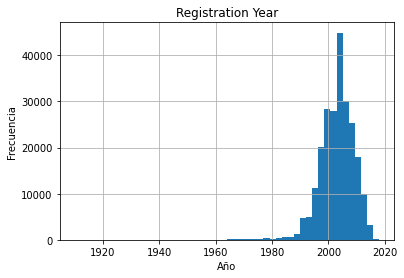

In [24]:
df_pre['registrationyear'].hist(bins=50)
plt.title('Registration Year')
plt.xlabel('Año')
plt.ylabel('Frecuencia')

Para el caso del año de registro se observa que la gráfica comienza a tener valores considerables a partir del año 1970. Para los años menores a este no se tiene una buena cantidad de datos, por lo que son poco reelevantes para el entrenamiento de modelos

Text(0, 0.5, 'Frecuencia')

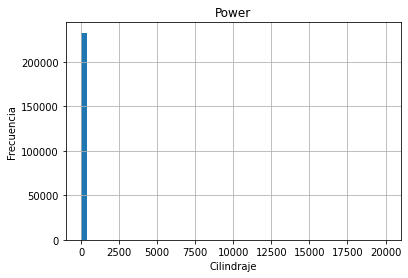

In [25]:
df_pre['power'].hist(bins=50)
plt.title('Power')
plt.xlabel('Cilindraje')
plt.ylabel('Frecuencia')

En este caso la gráfica no es muy clara, y esto se debe a que debe exsitir algunos datos cerca de 20000 que hacen que la escala se adapte. Considerando que segun google el automovil comercial con mayor capacidad de potencia del motor es aproximadamente 1500 cv, vamos a modificar la gráfica para que se muestre solo en este rango:

Text(0, 0.5, 'Frecuencia')

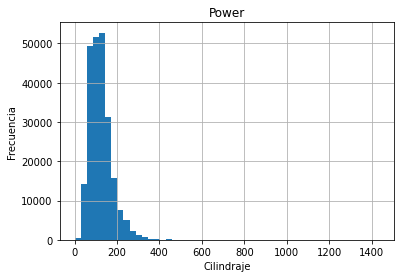

In [26]:

grafica_power=df_pre.loc[df_pre['power']<1500]
grafica_power['power'].hist(bins=50)
plt.title('Power')
plt.xlabel('Cilindraje')
plt.ylabel('Frecuencia')

Con esta gráfica se puede deducir que en su mayoría los autos se concentran entre 0 y 500 en cuanto a potencia, por lo que los datos atípicos van a tener poca influencia en las predicciones.

Como parte del procesamiento se va a comenzar con un paso fundamental en el entrenamiento de los modelos. El primer paso va a ser dividir los datos en datos en características y el objetivo:

In [27]:
# Separación de características y variable objetivo:
df_features = df_pre.drop('price', axis=1)
df_target = df_pre['price']

In [28]:
df_features

,vehicletype,registrationyear,gearbox,power,model,mileage,fueltype,brand,notrepaired
3,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,small,2008,manual,69,fabia,90000,gasoline,skoda,no
5,sedan,1995,manual,102,3er,150000,petrol,bmw,yes
6,convertible,2004,manual,109,2_reihe,150000,petrol,peugeot,no
10,sedan,2004,manual,105,3_reihe,150000,petrol,mazda,no
...,...,...,...,...,...,...,...,...,...
354359,sedan,2010,manual,140,golf,150000,gasoline,volkswagen,no
354360,wagon,2005,manual,3,3er,150000,gasoline,bmw,no
354362,sedan,2004,manual,225,leon,150000,petrol,seat,yes
354366,convertible,2000,auto,101,fortwo,125000,petrol,smart,no


In [29]:
df_target

3         1500
4         3600
5          650
6         2200
10        2000
          ... 
354359    7900
354360    3999
354362    3200
354366    1199
354367    9200
Name: price, Length: 233275, dtype: int64

Vamos a dividir las variables en nominales y numéricas ya que se necesita realizar la codificación de las variables nominales con OHE

In [30]:
# Dividiendo variables nominales y numéricas:

nominal_features = ['vehicletype','gearbox', 'model', 'fueltype', 'brand', 'notrepaired']
numeric_features = ['registrationyear', 'power', 'mileage']

#Creando transformadores para preprocesamiento
preprocessor = ColumnTransformer(
    transformers = [
        ('nominal', OneHotEncoder(handle_unknown = 'ignore',), nominal_features),
        ('numeric', StandardScaler(), numeric_features)
    ])


<div class="alert alert-block alert-success">
    <b>Comentario del revisor:</b>
Buen trabajo con la división de características y el plantear el pre-procesador para codificar las variables.
</div>


Se dividirá tambien los datos en la parte de entrenamiento y la parte de pruebas. Se utilizará el 75% de los datos para entrenar los modelos:

In [31]:
#Dividir datos en entrenamiento y prueba:
features_train, features_test, target_train, target_test = train_test_split(df_features, df_target, test_size=0.25, random_state=42)


In [32]:
features_train

,vehicletype,registrationyear,gearbox,power,model,mileage,fueltype,brand,notrepaired
156645,small,1998,manual,60,polo,150000,petrol,volkswagen,no
151791,sedan,2000,auto,163,c_klasse,150000,petrol,mercedes_benz,no
152854,small,2003,manual,80,fusion,150000,petrol,ford,no
68189,small,2009,auto,71,fortwo,70000,petrol,smart,no
75713,coupe,2003,manual,116,cooper,150000,petrol,mini,no
...,...,...,...,...,...,...,...,...,...
181965,small,2007,manual,60,fiesta,80000,petrol,ford,no
157411,coupe,1995,auto,136,e_klasse,150000,petrol,mercedes_benz,yes
200441,convertible,2012,manual,105,golf,30000,petrol,volkswagen,no
223233,suv,2010,manual,163,i_reihe,40000,petrol,hyundai,no


In [33]:
target_train

156645     1290
151791     3990
152854     2100
68189      3999
75713      2999
          ...  
181965     2900
157411     4990
200441    16866
223233    14999
185198    13500
Name: price, Length: 174956, dtype: int64

In [34]:
features_test

,vehicletype,registrationyear,gearbox,power,model,mileage,fueltype,brand,notrepaired
43604,wagon,2005,manual,102,passat,125000,petrol,volkswagen,no
83902,sedan,2005,manual,140,a3,150000,petrol,audi,no
107582,sedan,2010,manual,150,qashqai,150000,gasoline,nissan,no
153852,sedan,2001,auto,224,a4,150000,lpg,audi,no
3196,convertible,2012,manual,105,golf,40000,petrol,volkswagen,no
...,...,...,...,...,...,...,...,...,...
66269,suv,1993,manual,125,other,150000,petrol,opel,no
284737,convertible,2008,manual,120,2_reihe,70000,petrol,peugeot,no
159853,sedan,1993,auto,90,golf,125000,petrol,volkswagen,no
249718,sedan,2006,manual,105,golf,150000,gasoline,volkswagen,no


In [35]:
target_test

43604      5400
83902      6900
107582     9300
153852     3900
3196      14990
          ...  
66269      1100
284737     8950
159853     1250
249718     4300
84877      1650
Name: price, Length: 58319, dtype: int64

Una vez finalizada esta etapa de preprocesamiento vamos a continuar con el entrenamiento de modelos

## Entrenamiento del modelo 

Para entrenar los modelos se va a usar pipeline, y se va a tomar las siguientes consideraciones.
- Se va a utilizar codificación OHE para todas las pruebas, para que de esta manera todos los algoritmos estén en las mismas condiciones.
- Todos los algoritmos permiten ajuste de hiperparámetros, a excepción de la regresión Lineal, la cual no se puede modificar muchos parámetros de interés. Para los demas modelos se optará por mantener un número de estimadores de 50, 100 o 200 para las pruebas.
- En los modelos donde se puede modificar el parámetro "max_depth" se va a variar la profundidad desde 5, 10, 15 o 20.
- También en los modelos donde se puede modificar el parámetro "learning_rate" se ha establecido para todos un valor de 0.1

Una vez establecidas estas condiciones vamos a realizar el eentrenamiento de los modelos:

### Entrenando con el modelo de Regresión Lineal

In [36]:
%%time
#Creando pipeline con preprocesador y modelo

pipeline_lineal = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

#Entrenando el modelo
pipeline_lineal.fit(features_train, target_train)

#Predecir y evaluar
target_pred = pipeline_lineal.predict(features_test)

print("Raiz Error Cuadrático Medio: ", mean_squared_error(target_test, target_pred, squared = False))

Raiz Error Cuadrático Medio:  2652.568207761672
CPU times: user 4.58 s, sys: 7.68 s, total: 12.3 s
Wall time: 12.4 s


### Entrenando con el modelo de Random Forest

In [38]:
%%time
###Utilizando random forest regressor:

#Creando pipeline con preprocesador y modelo

pipeline_forest = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42))
])

#Entrenando el modelo
pipeline_forest.fit(features_train, target_train)

#Predecir y evaluar
target_pred = pipeline_forest.predict(features_test)

print("Raiz Error Cuadrático Medio en Random Forest: ", mean_squared_error(target_test, target_pred, squared = False))

Raiz Error Cuadrático Medio en Random Forest:  2332.4900612742795
CPU times: user 23.2 s, sys: 0 ns, total: 23.2 s
Wall time: 23.3 s


In [39]:
%%time
###Utilizando random forest regressor:

#Creando pipeline con preprocesador y modelo

pipeline_forest = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42))
])

#Entrenando el modelo
pipeline_forest.fit(features_train, target_train)

#Predecir y evaluar
target_pred = pipeline_forest.predict(features_test)

print("Raiz Error Cuadrático Medio en Random Forest: ", mean_squared_error(target_test, target_pred, squared = False))

Raiz Error Cuadrático Medio en Random Forest:  2332.6129708626736
CPU times: user 46.3 s, sys: 0 ns, total: 46.3 s
Wall time: 46.3 s


In [40]:
%%time
###Utilizando random forest regressor:

#Creando pipeline con preprocesador y modelo

pipeline_forest = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42))
])

#Entrenando el modelo
pipeline_forest.fit(features_train, target_train)

#Predecir y evaluar
target_pred = pipeline_forest.predict(features_test)

print("Raiz Error Cuadrático Medio en Random Forest: ", mean_squared_error(target_test, target_pred, squared = False))

Raiz Error Cuadrático Medio en Random Forest:  1864.5106444018527
CPU times: user 1min 57s, sys: 0 ns, total: 1min 57s
Wall time: 1min 58s


Vamos a observar ahora que sucede si aumentamos a 100 los estimadores y el 'max_depth'= a 10

In [41]:
%%time
###Utilizando random forest regressor:

#Creando pipeline con preprocesador y modelo

pipeline_forest = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42))
])

#Entrenando el modelo
pipeline_forest.fit(features_train, target_train)

#Predecir y evaluark
target_pred = pipeline_forest.predict(features_test)

print("Raiz Error Cuadrático Medio en Random Forest: ", mean_squared_error(target_test, target_pred, squared = False))

Raiz Error Cuadrático Medio en Random Forest:  1862.7833718189177
CPU times: user 3min 57s, sys: 0 ns, total: 3min 57s
Wall time: 3min 57s


### Utilizando Light GBM

In [42]:
%%time
#Creando pipeline con preprocesador y modelo

pipeline_lgbm = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LGBMRegressor(num_leaves=31, learning_rate=0.1, n_estimators=50, max_depth=5))
])

#Entrenando el modelo
pipeline_lgbm.fit(features_train, target_train)

#Predecir y evaluar
target_pred = pipeline_lgbm.predict(features_test)

print("Raiz Error Cuadrático Medio en LightGBM: ", mean_squared_error(target_test, target_pred, squared = False))

Raiz Error Cuadrático Medio en LightGBM:  1790.2060067644265
CPU times: user 2.2 s, sys: 0 ns, total: 2.2 s
Wall time: 2.21 s


In [43]:
%%time
#Creando pipeline con preprocesador y modelo

pipeline_lgbm = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LGBMRegressor(num_leaves=31, learning_rate=0.1, n_estimators=100, max_depth=10))
])

#Entrenando el modelo
pipeline_lgbm.fit(features_train, target_train)

#Predecir y evaluar
target_pred = pipeline_lgbm.predict(features_test)

print("Raiz Error Cuadrático Medio en LightGBM: ", mean_squared_error(target_test, target_pred, squared = False))

Raiz Error Cuadrático Medio en LightGBM:  1651.6325376086677
CPU times: user 4.04 s, sys: 5.48 ms, total: 4.05 s
Wall time: 4.08 s


In [44]:
%%time
#Creando pipeline con preprocesador y modelo

pipeline_lgbm = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LGBMRegressor(num_leaves=100, learning_rate=0.1, n_estimators=100, max_depth=20))
])

#Entrenando el modelo
pipeline_lgbm.fit(features_train, target_train)

#Predecir y evaluar
target_pred = pipeline_lgbm.predict(features_test)

print("Raiz Error Cuadrático Medio en LightGBM: ", mean_squared_error(target_test, target_pred, squared = False))

Raiz Error Cuadrático Medio en LightGBM:  1560.0625754247617
CPU times: user 5.68 s, sys: 65.4 ms, total: 5.74 s
Wall time: 5.8 s


In [45]:
%%time
#Creando pipeline con preprocesador y modelo

pipeline_lgbm = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LGBMRegressor(num_leaves=100, learning_rate=0.1, n_estimators=200, max_depth=20))
])

#Entrenando el modelo
pipeline_lgbm.fit(features_train, target_train)

#Predecir y evaluar
target_pred = pipeline_lgbm.predict(features_test)

print("Raiz Error Cuadrático Medio en LightGBM: ", mean_squared_error(target_test, target_pred, squared = False))

Raiz Error Cuadrático Medio en LightGBM:  1526.5676914786566
CPU times: user 10.7 s, sys: 96.9 ms, total: 10.8 s
Wall time: 10.9 s


### Utilizando CatBoostRegressor

In [46]:
%%time
#Creando pipeline con preprocesador y modelo

pipeline_catboost = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', CatBoostRegressor(iterations = 50, depth = 5, learning_rate=0.1, loss_function = 'RMSE', verbose=False))
])

#Entrenando el modelo
pipeline_catboost.fit(features_train, target_train)

#Predecir y evaluar
target_pred = pipeline_catboost.predict(features_test)

print("Raiz Error Cuadrático Medio en CatBoost: ", mean_squared_error(target_test, target_pred, squared = False))

Raiz Error Cuadrático Medio en CatBoost:  1937.5492965656117
CPU times: user 2.66 s, sys: 56.1 ms, total: 2.72 s
Wall time: 2.89 s


In [47]:
%%time
#Creando pipeline con preprocesador y modelo

pipeline_catboost = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', CatBoostRegressor(iterations = 100, depth = 5, learning_rate=0.1, loss_function = 'RMSE', verbose=False))
])

#Entrenando el modelo
pipeline_catboost.fit(features_train, target_train)

#Predecir y evaluar
target_pred = pipeline_catboost.predict(features_test)

print("Raiz Error Cuadrático Medio en CatBoost: ", mean_squared_error(target_test, target_pred, squared = False))

Raiz Error Cuadrático Medio en CatBoost:  1805.5591035435489
CPU times: user 4.13 s, sys: 12 ms, total: 4.14 s
Wall time: 4.24 s


In [48]:
%%time
#Creando pipeline con preprocesador y modelo

pipeline_catboost = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', CatBoostRegressor(iterations = 100, depth = 10, learning_rate=0.1, loss_function = 'RMSE', verbose=False))])

#Entrenando el modelo
pipeline_catboost.fit(features_train, target_train)

#Predecir y evaluar
target_pred = pipeline_catboost.predict(features_test)

print("Raiz Error Cuadrático Medio en CatBoost: ", mean_squared_error(target_test, target_pred, squared = False))

Raiz Error Cuadrático Medio en CatBoost:  1662.7944499699277
CPU times: user 11 s, sys: 27.6 ms, total: 11.1 s
Wall time: 11.3 s


In [49]:
%%time
#Creando pipeline con preprocesador y modelo

pipeline_catboost = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', CatBoostRegressor(iterations = 100, depth = 15, learning_rate=0.1, loss_function = 'RMSE', verbose=False))
])

#Entrenando el modelo
pipeline_catboost.fit(features_train, target_train)

#Predecir y evaluar
target_pred = pipeline_catboost.predict(features_test)

print("Raiz Error Cuadrático Medio en CatBoost: ", mean_squared_error(target_test, target_pred, squared = False))

Raiz Error Cuadrático Medio en CatBoost:  1590.486494477517
CPU times: user 1min 4s, sys: 15.8 s, total: 1min 20s
Wall time: 1min 20s


### Utilizando XGBoost

In [50]:
%%time
#Creando pipeline con preprocesador y modelo

pipeline_xgboost = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(objetive = 'reg:squarederror',learning_rate=0.1, 
                                   max_depth=5, n_estimators=50))
])

#Entrenando el modelo
pipeline_xgboost.fit(features_train, target_train)

#Predecir y evaluar
target_pred = pipeline_xgboost.predict(features_test)

print("Raiz Error Cuadrático Medio en XGBoost: ", mean_squared_error(target_test, target_pred, squared = False))

[21:13:14] WARNING: ../src/learner.cc:576: 
Parameters: { "objetive" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Raiz Error Cuadrático Medio en XGBoost:  1781.9546672648428
CPU times: user 11.8 s, sys: 47.6 ms, total: 11.9 s
Wall time: 11.9 s


In [51]:
%%time
#Creando pipeline con preprocesador y modelo

pipeline_xgboost = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(objetive = 'reg:squarederror',learning_rate=0.1, 
                                   max_depth=5, n_estimators=100))
])

#Entrenando el modelo
pipeline_xgboost.fit(features_train, target_train)

#Predecir y evaluar
target_pred = pipeline_xgboost.predict(features_test)

print("Raiz Error Cuadrático Medio en XGBoost: ", mean_squared_error(target_test, target_pred, squared = False))

[21:13:26] WARNING: ../src/learner.cc:576: 
Parameters: { "objetive" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Raiz Error Cuadrático Medio en XGBoost:  1706.0417887682281
CPU times: user 23 s, sys: 120 ms, total: 23.1 s
Wall time: 23.4 s


In [52]:
%%time
#Creando pipeline con preprocesador y modelo

pipeline_xgboost = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(objetive = 'reg:squarederror',learning_rate=0.1, 
                                   max_depth=10, n_estimators=100))
])

#Entrenando el modelo
pipeline_xgboost.fit(features_train, target_train)

#Predecir y evaluar
target_pred = pipeline_xgboost.predict(features_test)

print("Raiz Error Cuadrático Medio en XGBoost: ", mean_squared_error(target_test, target_pred, squared = False))

[21:13:49] WARNING: ../src/learner.cc:576: 
Parameters: { "objetive" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Raiz Error Cuadrático Medio en XGBoost:  1542.4508995125848
CPU times: user 46.4 s, sys: 231 ms, total: 46.6 s
Wall time: 46.9 s


In [53]:
%%time
#Creando pipeline con preprocesador y modelo

pipeline_xgboost = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(objetive = 'reg:squarederror',learning_rate=0.1, 
                                   max_depth=10, n_estimators=200))
])

#Entrenando el modelo
pipeline_xgboost.fit(features_train, target_train)

#Predecir y evaluar
target_pred = pipeline_xgboost.predict(features_test)

print("Raiz Error Cuadrático Medio en XGBoost: ", mean_squared_error(target_test, target_pred, squared = False))

[21:14:36] WARNING: ../src/learner.cc:576: 
Parameters: { "objetive" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Raiz Error Cuadrático Medio en XGBoost:  1525.7560692527459
CPU times: user 1min 27s, sys: 323 ms, total: 1min 27s
Wall time: 1min 28s


<div class="alert alert-block alert-success">
    <b>Comentario del revisor:</b>
    <p>¡Excelente trabajo en la implementación de pipelines y el uso de celdas mágicas para entrenar tus modelos! Tu elección de la métrica MSE (Mean Squared Error) para evaluar los modelos es adecuada, pero te sugiero considerar otras métricas en futuros proyectos, como MAPE (Mean Absolute Percentage Error) o SMAPE (Symmetric Mean Absolute Percentage Error). Estas métricas proporcionan diferentes perspectivas sobre los errores de predicción, especialmente en términos relativos.</p>
    <p>Además, considera usar RMSE (Root Mean Squared Error)sobre el MSE, pues tiene ventajas significativas. Al estar en la misma escala que tus datos objetivo, facilita la interpretación y comparación de los resultados. Es especialmente útil cuando los errores tienen consecuencias más graves, ya que penaliza más los errores grandes.</p>
    <p>Continúa explorando y aplicando diferentes enfoques y métricas para enriquecer tus análisis y obtener resultados más robustos y significativos. ¡Sigue así!</p>
</div>


## Análisis de los modelos

Una vez implementados los modelos y observados los resultados vamos a resumir la información obtenida en el siguiente recuadro:

|   | n_estimators | Depth | Learning Rate | RECM | Tiempo de procesamiento |
|---|------------|------------|------------|------------|------------|
| **Regresión Lineal** |           |           |           |           |           |
| 1 | - | - | - | 2652.56 | 12.5 s|
| **Random Forest Regressor** |           |           |           |           |           |
| 1 | 50 | 5 | - | 2332.49 | 24.5 s |
| 2 | 100 | 5 | - | 2332.61 | 45.7 s |
| 3 | 50 | 10 | - | 1864.51 | 1m 58 s |
| 4 | 100 | 10 | - | 1862.78 | 3m 56 s |
| **Light GBM** |           |           |           |           |           |
| 1 | 50 | 5 (leaves=31) | 0.1 | 1790.20 | 2.75 s |
| 2 | 100 | 10(leaves=31) | 0.1 | 1651.63 | 3.79 s|
| 3 | 100 | 20(leaves=100) | 0.1 | 1560.06 | 5.87 s |
| 4 | 200 | 20(leaves=100) | 0.1 | 1526.56 | 9.93 s |
| **Catboost** |           |           |           |           |           |
| 1 | 50 | 5 | 0.1 | 1937.54 | 2.83 s |
| 2 | 100 | 5 | 0.1 | 1805.55 | 4.22 s |
| 3 | 100 | 10 | 0.1 | 1662.79 | 11.2 s |
| 4 | 200 | 10 | 0.1 | 1590.18 | 20.8 s |
| **XGBoost** |           |           |           |           |           |
| 1 | 50 | 5 | 0.1 | 1781.95 | 11.6 s |
| 2 | 100 | 5 | 0.1 | 1706.04 | 21.7 s |
| 3 | 100 | 10 | 0.1 | 1542.45 | 44.4 s |
| 4 | 200 | 10 | 0.1 | 1525.75 | 1m 25 s |

**Observaciones sobre la información obtenida**

De los resultados que se obtuvieron con los diferentes modelos se ha podido extrar la siguiente información.
- El modelo de regresión lineal no permite muchos ajustes de hiperparámetros por lo que se lo puede uitlizar como una prueba de cordura para los demás métodos utilizados. En este método se observa que a pesar de tener un tiempo de porcesamiento relativamente bajo el RECM obtenido es el más alto de todos los métodos analizados.
- El modelo de RandomForestRegressor es el que tiene los peores resultados despues del modelo de Regresión lineal. Este modelo con una cantidad de estimadores de 50 y una profundidad de 5 obtiene un RECM de 2332, con un tiempo de procesamiento considerablemente bajo, sin embargo si aumentamos la cantidad de estimadores y la profundidad el tiempo de procesamiento aumenta drásticamente. Se observó que aumentar la cantidad de estimadores no afectaba en gran medida al RECM pero aumentar el parámetro depth si mejoraba este valor. Se logró un mínimo en el RECM con 100 estimadores y 10 en depth, sin embargo el tiempo de procesamiento llegó hasta casi 4 minutos.
- Con el modelo de Light GBM, aparte de los parámetros que se usan en los demás métodos, este modelo tiene un parámetro denominado 'num_leaves', el cual se detectó influye en gran medida a los resultados. Iniciando con 50 estimadores y una profundiad de 5, manteniendo el parámetro num_leaves con el valor predeterminado de 31 se logró un RECM de 1790, siendo mucho menor que los dos métodos anteriormente analizados, ademas de su tiempo de procesamiento muy bajo, el cual fue para este caso de solo 2.72 segundos. Modificando los parámetros de tal manera que se obtenga los mejores resultados se utilizó 200 estimadores, 20 de profundiad y 100 leaves, con lo cual se obtuvo un RECM de 1526 en tan solo 9.93 segundos. Se aumentó estas cantidad dado que el modelo es muy rápido. Estos valores de RECM pueden ser mejorados aumentando el parametro num_leaves, pero comienza duplicarse el tiempo de procesamiento sin ser un gran margen de mejora, por lo que se optó por mantener esos parámetros.
- Utilizando CatBoost con los parametros de 50 estimadores, 5 de porfundidad se logró un valor para el RECM de 1937, siendo mejor que el método RandomForestRegressor, pero peor que Light GBM, en un tiempo de 2.83 segundos, el cual supera por un pequeño márgen a LightGBM. Aumentando la cantidad de estimadores a 100 y de profundiad a 10 se logró el mínimo de RECM igual a 1590 con un tiempo de procesamiento de 20.8s. Este es un valor muy similar al mínimo logrado con LightGBM, aunque en el doble de tiempo, que para este caso resulta ser un tiempo muy bajo.
- Para el método XGBoost se logra con los parámetros iniciales de 50 estimadores, 5 de profundiad se logra un valor de RECM de 1781 en 11.6 Segundos. Este valor es muy similar al logrado con Light GBM, pero en un tiempo aproximadamente tres veces mayor. Modificando los parámetros a un número de estumadores de 200 y una profundiad de 10 se logró un valor de RECM de 1525 en un tiempo de 1 minuto y 25 segundos. Este valor supera por un margen muy pequeño a LightGBM, sin embargo el tiempo de procesamiento aumenta demasiado.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
¡Felicitaciones por incluir conclusiones intermedias en su proyecto! Esto es una práctica excelente ya que ayuda a comprender mejor los datos y a tomar decisiones informadas en la siguiente etapa del análisis. Continúa haciendo esto en futuros proyectos.</div>

### Prueba de los modelos utilizando una simulación de un automovil creado

Vamos a crear un dataframe de simulación de un automovil con datos que nos permitan generar una predicción de precio y se observará que tan diferentes son los precios obtenidos

In [54]:
simulation = pd.DataFrame([{
    'vehicletype': 'sedan',
    'registrationyear': 2015,
    'gearbox':'manual',
    'power': 110,
    'model':'corsa',
    'mileage': 50000,
    'fueltype': 'gasoline',
    'brand': 'opel',
    'notrepaired': 'no'
}])
            

In [55]:
simulation

,vehicletype,registrationyear,gearbox,power,model,mileage,fueltype,brand,notrepaired
0,sedan,2015,manual,110,corsa,50000,gasoline,opel,no


In [56]:
pipeline_lineal.predict(simulation)

array([11229.44304253])

In [57]:
pipeline_forest.predict(simulation)

array([14996.0876285])

In [58]:
pipeline_lgbm.predict(simulation)


array([14416.46218045])

In [59]:
pipeline_catboost.predict(simulation)

array([14602.05629713])

In [60]:
pipeline_xgboost.predict(simulation)

array([14018.486], dtype=float32)

<div class="alert alert-block alert-success">
    <b>Comentario del revisor:</b>
    <p>¡Gran trabajo en la revisión y verificación de tu modelo! Estás aplicando prácticas muy importantes en ciencia de datos. Además de estos pasos, te recomiendo encarecidamente considerar la inclusión de un modelo de referencia, como un modelo dummy. Esto puede servir como un punto de comparación valioso para tus modelos más avanzados.</p>
    <p>Un modelo dummy, por ejemplo, podría ser una simple regresión lineal sin parámetros ajustados o un modelo que siempre predice la media o la mediana de los valores objetivo. Comparar tus modelos con este punto de referencia básico te ayudará a entender cuánto mejoramiento aportan tus modelos y asegurará que realmente están aprendiendo patrones relevantes de los datos y no solo replicando tendencias generales.</p>

</div>


## Conclusiones

Despues de realizar las tareas solicitadas y obtener multiples resultados se ha llegado a las siguientes conclusiones:
- Al realizar el preprocesamiento de datos se detectaro varias irregularidades en la información, una de las primeras es la gran cantidad de datos ausentes que existen. Información como el modelo, año de registro, tipo de vehiculo, etc, es de gran importancia para el precio de un automovil, por lo que no tener esta información dificulta dar un valor al vehiculo. Para este caso se prefirió eliminar las filas con datos ausentes ya que pueden alterar el resultado de las predicciones y ademas a pesar de eliminar estas filas aun se tenía una gran cantidad de datos.
- Otro problema que se encontró con los datos fueron valores extraños en algunas de las columnas de datos como por ejemplo, automóviles con precios de 0 o 1, etc, los cuales no tendrían sentido, ademas de valores de potencia(power) de 0 o cercanos a 0. Esto nos indica que existen problemas en la adquisición de datos, lo cual sugiere que se deba revisar la forma en la cual se está extrayendo la información.
- A pesar de la información que fue eliminada, la base de datos es lo suficientemente grande como para entrenar cualquier modelo, por lo cual no se encuentra problema de eliminar esa gran cantidad de datos de aproximadamente 100 mil filas.
- Para la etapa de preprocesamiento se decidió eliminar columnas que no son de importancia para determinar el precio de un vehículo, con lo que se redujo el número de características para el entrenamiento.
- Se entrenó 5 diferentes modelos de regresión y se concluyo que el mejor modelo de todos los entrenados tomando en cuenta la calidad de sus predicciones y la velocidad de análisis es el modelo Light GBM, con el cual se obtuvo uno de los menores valores de RECM(1590) y el menor de los tiempos de ejecución.
- El modelo que tuvo el menor valor de RECM fue XGBoost, el cual solo es mejor por un pequeño margen a Light GBM pero el tiempo de procesamiento aumenta considerablemente.
- Entre los modelos de decenso de gradiente utilizados, se puede decir que los tres dan resultados similares en cuanto a calidad de las predicciones, sin embargo sus cargas computacionales varían significativamente.
- El modelo de regresión lineal fue el que peor resultados entregó en relación a la calidad de las predicciones, sin embargo su carga computacional fue baja.
- El modelo de RandomForestRegressor entrega predicciones de una calidad no tan buena, aunque mejores que el modelo de regresión lineal, sin embargo, el tiempo de procesamiento es demasiado alto por lo que no se podría considerar como uno de los mejores modelos.

# Lista de control

Escribe 'x' para verificar. Luego presiona Shift+Enter

- [x]  Jupyter Notebook está abierto
- [ ]  El código no tiene errores- [ ]  Las celdas con el código han sido colocadas en orden de ejecución- [ ]  Los datos han sido descargados y preparados- [ ]  Los modelos han sido entrenados
- [ ]  Se realizó el análisis de velocidad y calidad de los modelos

<div class="alert alert-block alert-success">
    <b>¡Tu proyecto está muy bien hecho y aprobado! 🎉</b>
    <ul>
        <li>Excelente selección y uso de modelos de Machine Learning.</li>
        <li>Implementación efectiva de técnicas de preprocesamiento de datos.</li>
        <li>Análisis profundo y bien fundamentado.</li>
        <li>Uso adecuado de visualizaciones para interpretar los datos.</li>
    </ul>
    <p>Has demostrado un gran dominio en las áreas clave del curso. ¡Sigue con este excelente trabajo en los próximos sprints! 👍</p>
</div>
